<a href="https://colab.research.google.com/github/botkin92/Introduction_to_Neural_Networks/blob/lesson_1/Lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Функции активации

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Дата сет ирисов

# Данные

In [105]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [106]:
# df = pd.read_csv('Iris.csv')
df = pd.read_csv('MyDrive/Colab Notebooks/Introduction_to_Neural_Networks/Iris.csv')

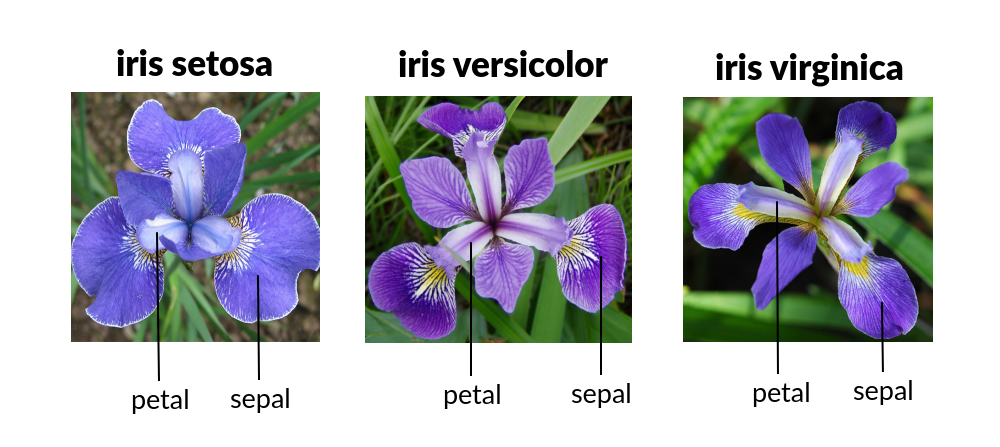

чашелистик и лепесток

In [107]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [108]:
data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy()

In [109]:
data.shape

(150, 4)

In [110]:
# data

# Двуслойная нейронная сеть

In [111]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

# import numpy as np
# import pandas as pd
import seaborn as sns
# import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [112]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# ReLU и ее производная
def ReLU(x):
    return x  *  (x  >  0)

def ReLU_deriv(x):
    return 1  *  (x  >  0)

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

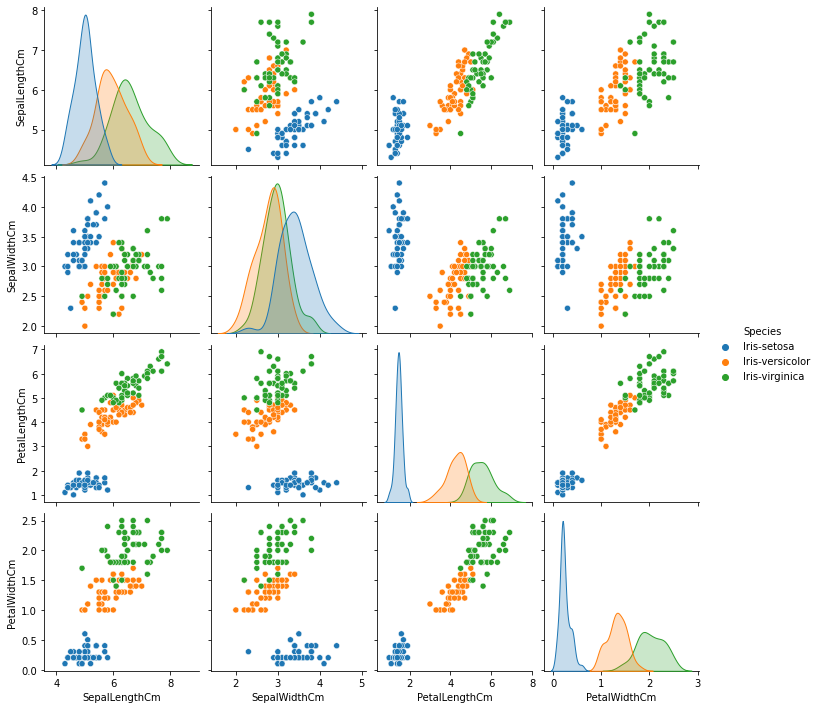

In [113]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
# iris_data = pd.read_csv("Iris.csv")
iris_data = pd.read_csv('MyDrive/Colab Notebooks/Introduction_to_Neural_Networks/Iris.csv')

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
   

y_train

In [128]:
### Шаг 3. Обученние нейронной сети
# присваивание случайных весов
np.random.seed(1)  # 0
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.5  # 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

Точность нейронной сети 97.48%


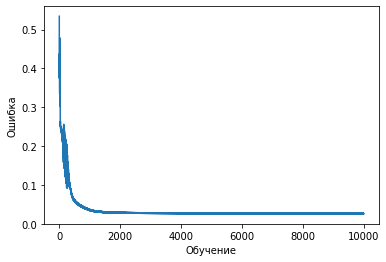

In [129]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [130]:
errors[-1]

0.025227817154744796

In [131]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

In [132]:
layer1 = sigmoid(np.dot(X_test, w0))
pred = sigmoid(np.dot(layer1, w1))

In [133]:
print(classification_report(y_test.argmax(-1), pred.argmax(-1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [134]:
print(multilabel_confusion_matrix(y_test.argmax(-1), pred.argmax(-1)))

[[[31  0]
  [ 0 19]]

 [[33  1]
  [ 2 14]]

 [[33  2]
  [ 1 14]]]


Некоторые результаты:

Результаты при n = 0.1, iter = 10000  

Точность нейронной сети 97.33%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.94        50
    macro avg      0.94      0.94      0.94        50  
    weighted avg   0.94      0.94      0.94        50  


Результаты при n = 0.5, iter = 10000 - шаг обучения влияет на метрику.  

Точность нейронной сети 97.26%  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50  
    macro avg      0.96      0.96      0.96        50  
    weighted avg   0.96      0.96      0.96        50

Результаты при n = 0.5, iter = 10000, другие начальные веса w (np.random.seed с 0 на 1) - существенных отличий нет, вероятно градиентный бустинг "пришел" к тем же локальным минимумам.  

Точность нейронной сети 97.48%  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.88      0.90        16
           2       0.88      0.93      0.90        15

    accuracy                           0.94        50
    macro avg      0.94      0.94      0.94        50
    weighted avg   0.94      0.94      0.94        50


Реализация с функцией активации ReLU

In [141]:
### Шаг 3. Обученние нейронной сети
# присваивание случайных весов
np.random.seed(0)
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = ReLU(np.dot(layer0, w0))
    layer2 = ReLU(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * ReLU_deriv(np.dot(layer1, w1))
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * ReLU_deriv(np.dot(layer0, w0))
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

Точность нейронной сети 66.67%


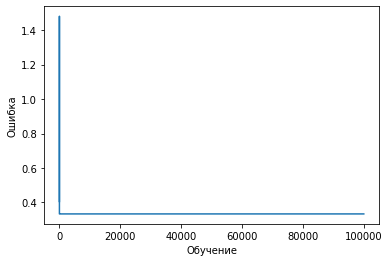

In [142]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

In [143]:
layer1 = ReLU(np.dot(X_test, w0))
pred = ReLU(np.dot(layer1, w1))

In [144]:
print(classification_report(y_test.argmax(-1), pred.argmax(-1)))

              precision    recall  f1-score   support

           0       0.38      1.00      0.55        19
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        15

    accuracy                           0.38        50
   macro avg       0.13      0.33      0.18        50
weighted avg       0.14      0.38      0.21        50



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
